## Testing different ensembling combinations

In [14]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import timeit
import matplotlib.pyplot as plt
from random import shuffle

from sklearn import linear_model, preprocessing
from sklearn.cluster import KMeans
from collections import defaultdict

from keras.models import Sequential
from keras.layers import Dense, Dropout
# fix random seed for reproducibility
np.random.seed(7)
path = os.getcwd()

In [71]:
#### CALCULATE WRMSE FOR ALL THE RESULTS FILES 
#def evaluate(includeTotalZone):

indices = []
for i in range(10):
    for j in range(10):
        for k in range(10):
            indices.append((0.1*i, 0.1*j, 0.1*k))

indices = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]

best_wrmse = 10**99
for sample in indices:   
    num = 0 
    denom = 0  
    zone_21 = np.zeros(1344)

    for zone in range(1, 21):
        base_data = pd.read_csv(path + '/NN_inputs/Neural_results_z{}' + str(zone) + '.csv')
        wave_data = pd.read_csv(path + '/NN_inputs/wavelet_prediction_z{}.csv'.format(str(zone)))
        par_data = pd.read_csv(path + '/NN_inputs/parametric_prediction_z{}.csv'.format(str(zone)))
        
        actual = np.array(base_data['actual'])
        neural = np.array(base_data['predicted_NN'])
        parametric = np.array(par_data['predicted'])
        wavelet = np.array(wave_data['predicted_NN'])
        
        #choose random numbers
        
        random = np.array(sample)
        '''
        if np.sum(random) == 0:
            random = [0.333, 0.333,0.333]
        else:
            random /= np.sum(random)
        '''
    
        final = random[0] * neural + random[1] * parametric + random[2] * wavelet
        
        diffs = actual - final
        zone_21 += diffs 

        diffs = np.reshape(diffs,(24,int(len(diffs)/24)))
        diffs = diffs[:,np.random.choice(56, 14)] ** 2
        num +=  np.sum(diffs)
        denom += diffs.shape[0] * diffs.shape[1]

        #print(zone, 1000 * np.sum(diffs) / sum(zone_data['actual'] ** 2))

    if True:
        zone_21 = np.reshape(zone_21,(24,int(len(zone_21)/24)))
        zone_21 = zone_21[:,np.random.choice(56, 14)]
        
        zone_21 = (zone_21 ** 2) * 20

        num += np.sum(zone_21)
        denom += 14 * 24 * 20

    wrmse = (num/denom) ** 0.5
    print (wrmse)
    #print (wrmse, best_wrmse, random), 'not in'
    if wrmse < best_wrmse:
        print (wrmse, random)
        best_wrmse = wrmse
        params = random
    
            
    
    #print (wrmse)

119132.778087
119132.778087 [1 0 0]
81501.9217445
81501.9217445 [0 1 0]
123749.406788


In [67]:
best_wrmse, params

(76639.896427143118, array([ 0.11111111,  0.77777778,  0.11111111]))

In [85]:
for zone in range(1, 21):
        base_data = pd.read_csv(path + '/NN_inputs/Neural_results_z{}' + str(zone) + '.csv')
        wave_data = pd.read_csv(path + '/NN_inputs/wavelet_prediction_z{}.csv'.format(str(zone)))
        par_data = pd.read_csv(path + '/NN_inputs/parametric_prediction_z{}.csv'.format(str(zone)))
        
        print (len(base_data['zone']), len(par_data['Zone']), len(wave_data['zone']))

1344 1288 1344
1344 1288 1344
1344 1288 1344
1344 1288 1344
1344 1288 1344
1344 1288 1344
1344 1288 1344
1344 1288 1344
1344 1288 1344
1344 1288 1344
1344 1288 1344
1344 1288 1344
1344 1272 1344
1344 1265 1344
1344 1265 1344
1344 1265 1344
1344 1265 1344
1344 1265 1344
1344 1265 1344
1344 1265 1344


In [32]:
zonemse = defaultdict(dict)

for arch in ['p', 'n', 'w']:
    num = 0 
    denom = 0  
    for zone in range(1, 21):
        num = 0 
        denom = 0
        base_data = pd.read_csv(path + '/NN_inputs/Neural_results_z{}' + str(zone) + '.csv')
        wave_data = pd.read_csv(path + '/NN_inputs/wavelet_prediction_z{}.csv'.format(str(zone)))
        par_data = pd.read_csv(path + '/NN_inputs/parametric_prediction_z{}.csv'.format(str(zone)))

        actual = np.array(base_data['actual'])[:(3*168)]
        neural = np.array(base_data['predicted_NN'])[:(3*168)]
        parametric = np.array(par_data['predicted'])[:(3*168)]
        wavelet = np.array(wave_data['predicted_NN'])[:(3*168)]

        #choose random numbers
        if arch == 'p':
            final = parametric
        elif arch == 'n':
            final = neural
        elif arch == 'w':
            final = wavelet
        else:
            print ('problem')

        diffs = actual - final

        diffs = np.reshape(diffs,(24,int(len(diffs)/24)))
        diffs = diffs[:,np.random.choice(21, 14)] ** 2
        num +=  np.sum(diffs)
        denom += 14*24

        #print(zone, 1000 * np.sum(diffs) / sum(zone_data['actual'] ** 2))


        wrmse = (num/denom) ** 0.5
        wrmse /= (np.sum(final) / len(final))
        
        zonemse[arch][zone] = wrmse

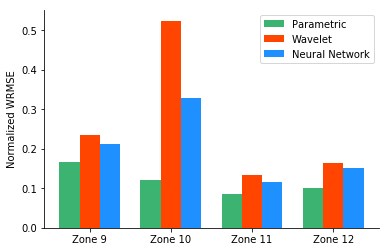

In [222]:
ind = 0
color = {}
color['p'] = 'mediumseagreen'
color['n'] = 'dodgerblue'
color['w'] = 'orangered'
label = {}
label['p'] = 'Parametric'
label['n'] = 'Neural Network'
label['w'] = 'Wavelet'

plt.clf()
ax = plt.subplot(111)
for zone in range(9, 13):
    for model in ['p', 'w', 'n']:
        if zone == 9:
            lbl = label[model]
        else:
            lbl = None
        ax.bar(ind, zonemse[model][zone], 1, color = color[model], label = lbl)
        ind += 1
    ind += 1
plt.xticks((1, 5,  9, 13), ('Zone 9', 'Zone 10', 'Zone 11', 'Zone 12'))
plt.ylabel('Normalized WRMSE')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
plt.savefig(path + '/plots/wrmsebar.png', bbox_inches='tight', transparent=True)
plt.show()

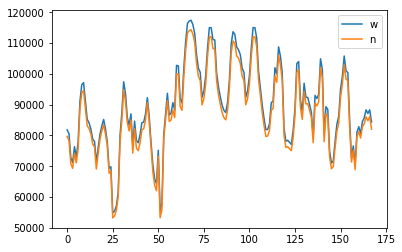

In [160]:
#plt.plot(parametric[:168], label = 'p')
plt.plot(wavelet[:168], label = 'w')
plt.plot(neural[:168], label = 'n')
#plt.plot(actual[:168], label = 'a')
plt.legend()
plt.show()


In [68]:
#### CALCULATE WRMSE FOR ALL THE RESULTS FILES 
#def evaluate(includeTotalZone):

indices = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (0.11111111,  0.77777778,  0.11111111)]
            
for sample in indices:   
    num = 0 
    denom = 0  
    zone_21 = np.zeros(1344)

    for zone in range(1, 21):
        base_data = pd.read_csv(path + '/NN_inputs/Neural_results_z{}' + str(zone) + '.csv')
        wave_data = pd.read_csv(path + '/NN_inputs/wavelet_prediction_z{}.csv'.format(str(zone)))
        par_data = pd.read_csv(path + '/NN_inputs/parametric_prediction_z{}.csv'.format(str(zone)))
        
        actual = np.array(base_data['actual'])
        neural = np.array(base_data['predicted_NN'])
        parametric = np.array(par_data['predicted'])
        wavelet = np.array(wave_data['predicted_NN'])
        
        #choose random numbers
        
        random = np.array(sample)
        
        final = random[0] * neural + random[1] * parametric + random[2] * wavelet
        
        diffs = actual - final
        x = 1344
        zone_21 += diffs 
        denom += x
       

        diffs = np.reshape(diffs,(24,int(len(diffs)/24))) ** 2
        num +=  np.sum(diffs)

    if True:
        zone_21 = np.reshape(zone_21,(24,int(len(zone_21)/24)))

        zone_21 = (zone_21 ** 2) * 20
        print (x)
        num += np.sum(zone_21)
        denom += x * 20

    wrmse = (num/denom) ** 0.5         
    
    print (wrmse)

1344
123245.608313
1344
84308.5626712
1344
120097.133422
1344
83673.7394543
